In [2]:
using Revise, ReachabilityAnalysis, Plots
const RA = ReachabilityAnalysis

┌ Info: Precompiling ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1260


ReachabilityAnalysis

In [ ]:
idx = collect(10:13)

In [ ]:
RA.nfolds(idx, 1)

-------

## No Clustering

In [16]:
Z = [rand(Zonotope) + 3.0 * i * [1.0, 1.0] for i in 1:10];

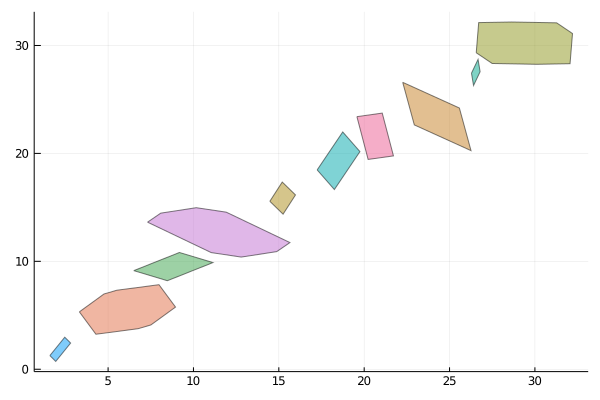

In [17]:
plot(Z)

In [20]:
NoClustering()

NoClustering{Missing}()

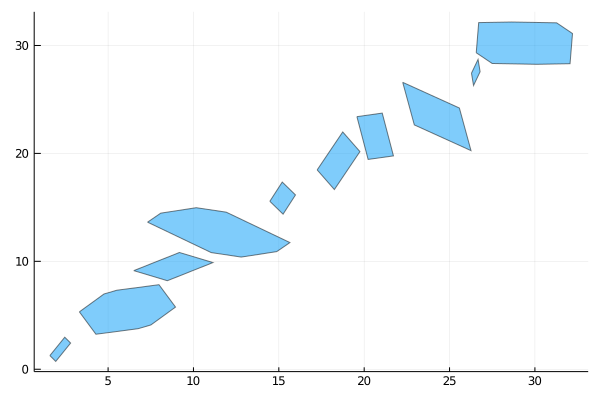

In [24]:
F = Flowpipe([ReachSet(Zi, 0 .. 0) for Zi in Z])

CF = cluster(F, 1:length(Z), NoClustering())

plot(CF, vars=(1, 2))

## Lazy clustering

In [26]:
LazyClustering()

LazyClustering{Missing}(missing)

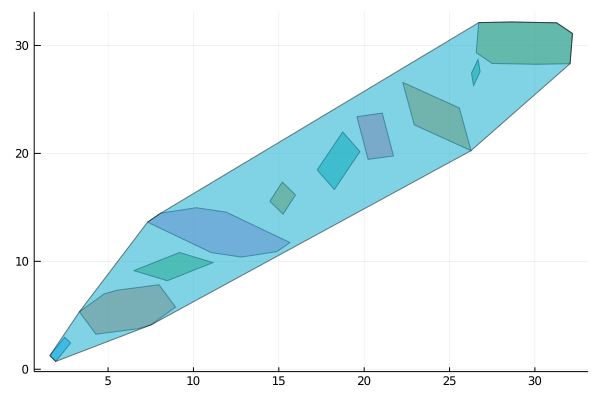

In [36]:
CF = cluster(F, 1:length(Z), LazyClustering())

plot(Z)
plot!(set(CF[1]))

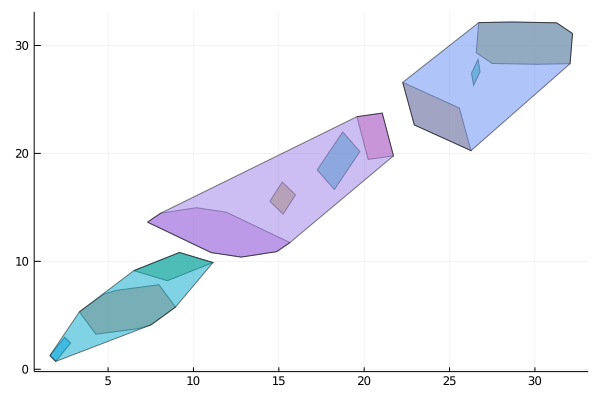

In [47]:
CF = cluster(F, 1:length(Z), LazyClustering(3))

plot(Z)
plot!([set(c) for c in CF])

In [48]:
length(F)

10

In [55]:
cl = LazyClustering([1:2, 3:10])

LazyClustering{Array{UnitRange{Int64},1}}(UnitRange{Int64}[1:2, 3:10])

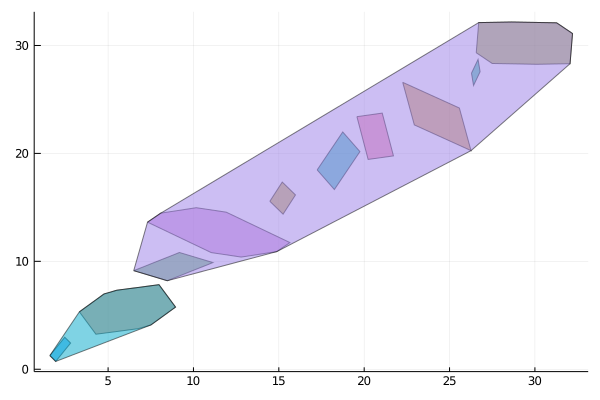

In [56]:
CF = cluster(F, 1:length(Z), cl)

plot(Z)
plot!([set(c) for c in CF])

## Box Partition constructor

In [57]:
BoxClustering()

BoxClustering{Missing,Missing}(missing, missing)

In [59]:
CF = cluster(F, 1:length(Z), BoxClustering())

1-element Array{ReachSet{Float64,Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}},1}:
 ReachSet{Float64,Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}}(Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([16.896102646521683, 16.450018288320162], [15.30619827276604, 15.726078889402633]), [0, 0])

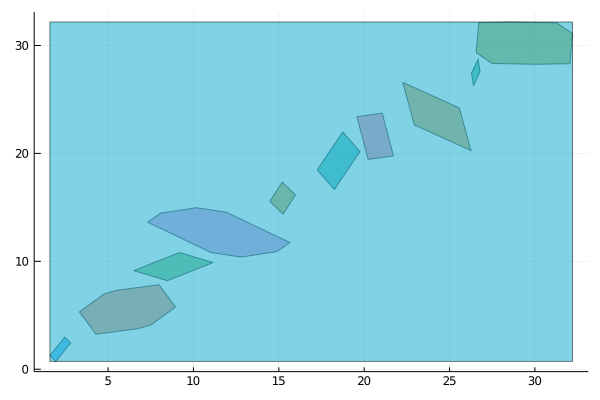

In [60]:
plot(Z)
plot!(set(CF[1]))

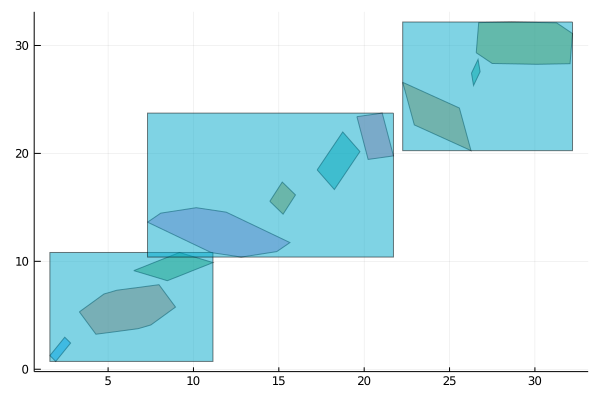

In [64]:
CF = cluster(F, 1:length(Z), BoxClustering(3))

plot(Z)
plot!([c for c in CF], vars=(1, 2))

In [67]:
BoxClustering([1:2, 3:10])

BoxClustering{Array{UnitRange{Int64},1},Missing}(UnitRange{Int64}[1:2, 3:10], missing)

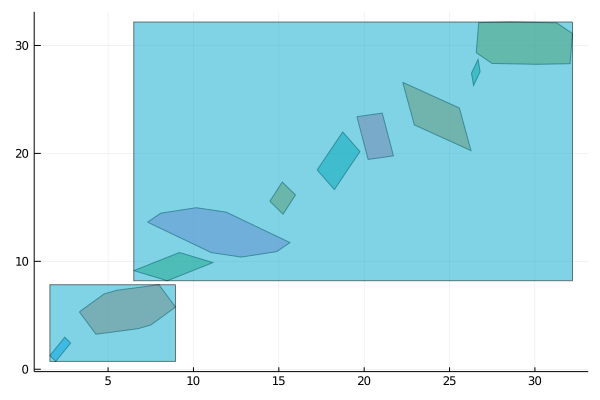

In [68]:
CF = cluster(F, 1:length(Z), BoxClustering([1:2, 3:10]))

plot(Z)
plot!([c for c in CF], vars=(1, 2))

## Bx partition split after clustering

In [92]:
BoxClustering(missing, 2)

BoxClustering{Missing,Int64}(missing, 2)

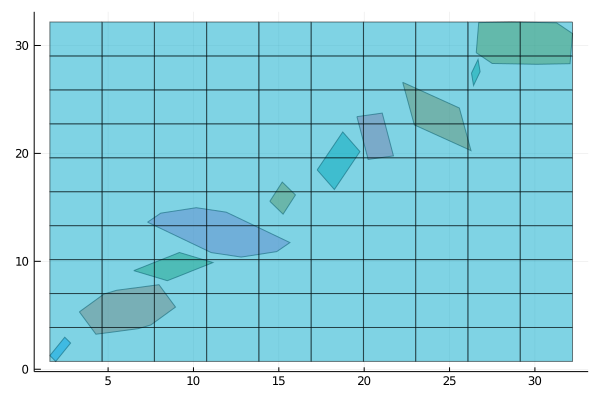

In [105]:
CF = cluster(F, 1:length(Z), BoxClustering(missing, 10))

plot(Z)
plot!([c for c in CF], vars=(1, 2))

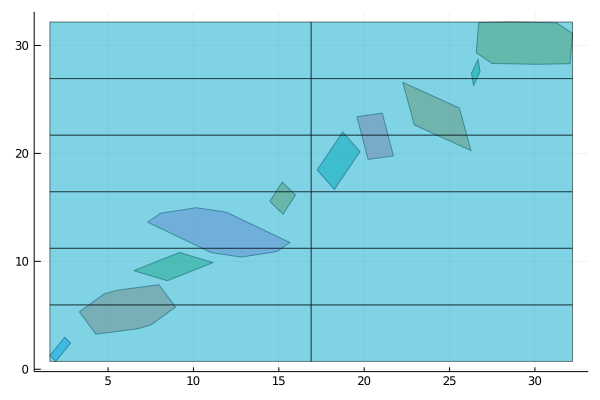

In [104]:
CF = cluster(F, 1:length(Z), BoxClustering(missing, [2, 6]))

plot(Z)
plot!([c for c in CF], vars=(1, 2))

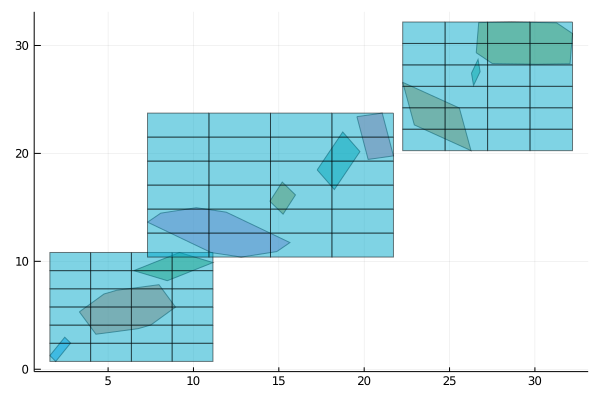

In [103]:
CF = cluster(F, 1:length(Z), BoxClustering(3, [4, 6]))

plot(Z)
plot!([c for c in CF], vars=(1, 2))

----

## Zonotope

In [131]:
Z = [LazySets.translate(rand(Zonotope), 3.0 * i * [1.0, 1.0]) for i in 1:5];
F = Flowpipe([ReachSet(Zi, 0 .. 0) for Zi in Z]);

In [132]:
typeof(F)

Flowpipe{Float64,ReachSet{Float64,Zonotope{Float64,Array{Float64,1},Array{Float64,2}}},Array{ReachSet{Float64,Zonotope{Float64,Array{Float64,1},Array{Float64,2}}},1}}

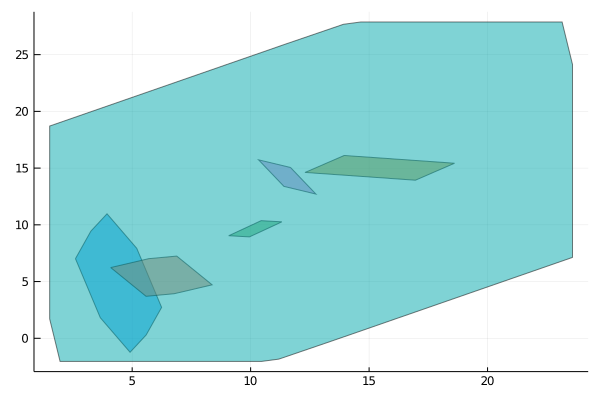

In [133]:
CF = cluster(F, 1:length(Z), ZonotopeClustering())

plot(Z)
plot!([c for c in CF], vars=(1, 2))